I am not getting good models. I need to spend some more time exploring the attributes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import datetime

In [3]:
data = pd.read_csv('/home/ajoshi/drive/snippets/toptal/clean_data_v1.csv', dtype={'PatientId': str, 'AppointmentID': str})

In [4]:
data.dtypes

PatientId            object
AppointmentID        object
Gender               object
ScheduledDay         object
AppointmentDay       object
Age                   int64
Neighbourhood        object
Scholarship           int64
Hipertension          int64
Diabetes              int64
Alcoholism            int64
Handcap               int64
SMS_received          int64
Gap                  object
Gap.d                 int64
No-show               int64
visit_num           float64
AppointmentMonth      int64
dtype: object

In [5]:
data['visit_num'] = data['visit_num'].apply(lambda x: int(x))

In [6]:
nbd_ns_ct = pd.crosstab(data['Neighbourhood'], data['No-show'])

In [7]:
nbd_sch_ct = pd.crosstab(data['Neighbourhood'], data['Scholarship'])

In [8]:
nbd_ct = pd.DataFrame.merge(nbd_ns_ct, nbd_sch_ct, left_index=True, right_index=True)

In [9]:
nbd_ct.columns = ['0-No-show', '1-No-show', '0-Scholarship','1-Scholarship']

In [10]:
nbd_ct

,0-No-show,1-No-show,0-Scholarship,1-Scholarship
Neighbourhood,,,,
AEROPORTO,7,1,8,0
ANDORINHAS,1686,509,1874,321
ANTÔNIO HONÓRIO,212,45,243,14
ARIOVALDO FAVALESSA,207,61,216,52
BARRO VERMELHO,327,91,418,0
...,...,...,...,...
SÃO JOSÉ,1461,407,1688,180
SÃO PEDRO,1849,497,2025,321
TABUAZEIRO,2467,552,2494,525


It appears that at the neighbourhood level, the no-show is reasonably predicted by Scholarship. How to check if that is true?

In [11]:
stats.fligner(nbd_ct['0-No-show'], nbd_ct['0-Scholarship'])

FlignerResult(statistic=0.5361939805093927, pvalue=0.46401435867070984)

In [12]:
stats.ttest_ind(nbd_ct['0-No-show'], nbd_ct['0-Scholarship'])

Ttest_indResult(statistic=-0.7361926965125954, pvalue=0.46269140065873604)

<AxesSubplot:xlabel='0-Scholarship', ylabel='0-No-show'>

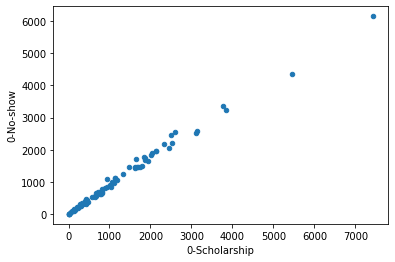

In [13]:
nbd_ct.plot.scatter(y='0-No-show', x ='0-Scholarship')

**This is a very interesting observation. At the level of a neighbourhood, <code>Scholarship</code> and <code>No-Show</code> are strongly correlated.**

## Segmentation of Age

In [14]:
age_ct = pd.crosstab(data['Age'], data['No-show']).apply(lambda r: r/r.sum(), axis=1)

<AxesSubplot:xlabel='Age'>

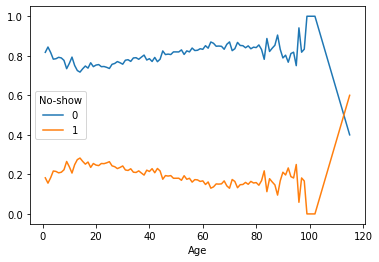

In [15]:
age_ct.plot()

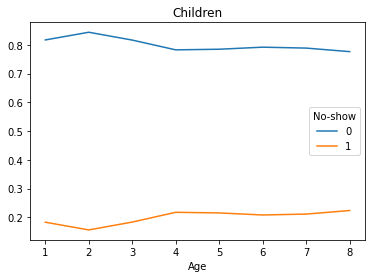

In [16]:
ax = age_ct[age_ct.index <= 8].plot()
ignore = ax.set_title('Children')

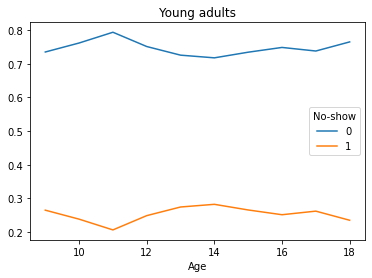

In [17]:
ax = age_ct[((age_ct.index > 8) & (age_ct.index <= 18))].plot()
ignore = ax.set_title('Young adults')

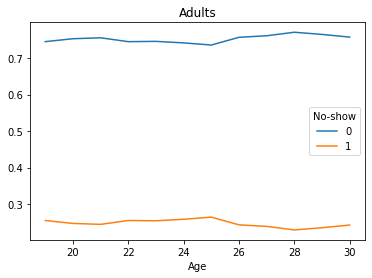

In [18]:
ax = age_ct[(age_ct.index > 18) & (age_ct.index <= 30)].plot()
ignore = ax.set_title('Adults')

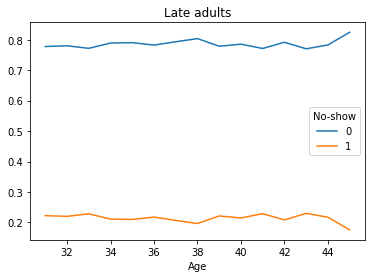

In [19]:
ax = age_ct[(age_ct.index > 30) & (age_ct.index <= 45)].plot()
ignore = ax.set_title('Late adults')

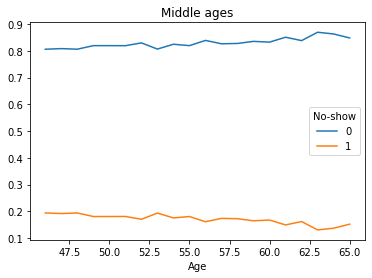

In [20]:
ax = age_ct[(age_ct.index > 45) & (age_ct.index <= 65)].plot()
ignore = ax.set_title('Middle ages')

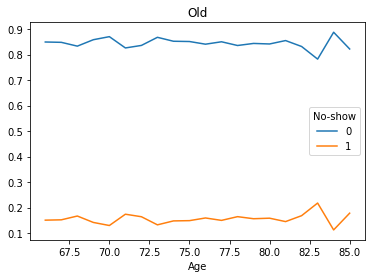

In [21]:
ax = age_ct[(age_ct.index > 65) & (age_ct.index <= 85)].plot()
ignore = ax.set_title('Old')

In [22]:
children = [-3] * 9
young_adults = [-2] * 10
adults = [-1] * 12
late_adults = [0] * 15
middle_ages = [1] * 20
old = [2] * 20
very_old = [3] * 35

age_maps = [children, young_adults, adults, late_adults, middle_ages, old, very_old]

In [23]:
import itertools

In [24]:
age_group = [x for x in itertools.chain.from_iterable(age_maps)]
age = [n for n in range(len(age_group))]

In [25]:
age_map = pd.DataFrame({"Age": age, "Age.Grp": age_group})
age_map.head()

,Age,Age.Grp
0,0,-3
1,1,-3
2,2,-3
3,3,-3
4,4,-3


In [26]:
data_1 = data.merge(age_map, on=['Age'])

In [27]:
data_1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gap,Gap.d,No-show,visit_num,AppointmentMonth,Age.Grp
0,11111462625267,5715720,F,2016-05-18T14:58:29Z,2016-06-08 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,1,20 days 09:01:31,20,0,1,6,1
1,112182719252,5621613,F,2016-04-26T10:32:51Z,2016-05-16 00:00:00+00:00,65,DA PENHA,0,1,1,0,0,0,19 days 13:27:09,19,1,1,5,1
2,112182719252,5748776,F,2016-05-31T07:16:38Z,2016-06-06 00:00:00+00:00,65,DA PENHA,0,1,1,0,0,1,5 days 16:43:22,5,0,2,6,1
3,11415436912447,5696867,M,2016-05-13T14:29:51Z,2016-05-30 00:00:00+00:00,65,SANTA LUÍZA,0,0,0,0,0,1,16 days 09:30:09,16,0,1,5,1
4,115167768551541,5609492,M,2016-04-20T15:59:42Z,2016-05-12 00:00:00+00:00,65,JABOUR,0,0,0,0,0,1,21 days 08:00:18,21,0,1,5,1


## Segmentation of Neighbourhood

In [28]:
nbd_ns_ct = nbd_ns_ct.apply(lambda r: r/r.sum(), axis=1)

In [29]:
nbd_ns_ct.columns

Int64Index([0, 1], dtype='int64', name='No-show')

In [30]:
nbd_ns_ct.columns = ['0-No-show', '1-No-show']

In [31]:
nbd_ns_ct.head()

,0-No-show,1-No-show
Neighbourhood,,
AEROPORTO,0.875000,0.125000
ANDORINHAS,0.768109,0.231891
ANTÔNIO HONÓRIO,0.824903,0.175097
ARIOVALDO FAVALESSA,0.772388,0.227612
BARRO VERMELHO,0.782297,0.217703


In [32]:
nbd_ns_ct.sort_values(['0-No-show'])

,0-No-show,1-No-show
Neighbourhood,,
ILHAS OCEÂNICAS DE TRINDADE,0.000000,1.000000
SANTOS DUMONT,0.708567,0.291433
SANTA CECÍLIA,0.729120,0.270880
SANTA CLARA,0.733871,0.266129
ITARARÉ,0.736811,0.263189
...,...,...
SOLON BORGES,0.851770,0.148230
MÁRIO CYPRESTE,0.855586,0.144414
AEROPORTO,0.875000,0.125000


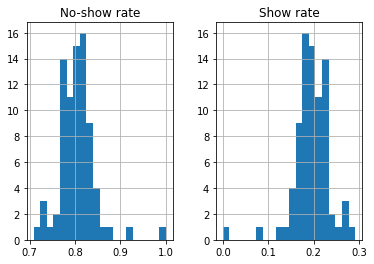

In [41]:
result = nbd_ns_ct.loc[nbd_ns_ct['0-No-show'] > 0.7].hist(bins=20)
result[0][0].set_title('No-show rate')
ignore = result[0][1].set_title('Show rate')

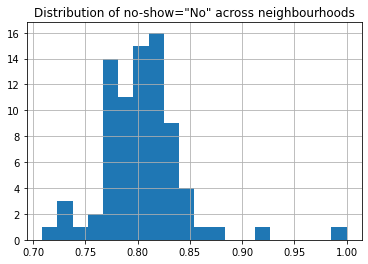

In [46]:
result = nbd_ns_ct.loc[nbd_ns_ct['0-No-show'] > 0.7][['0-No-show']].hist(bins=20)
result[0][0].set_title('Distribution of no-show="No" across neighbourhoods')
plt.savefig('nbd.png')

In [100]:
nbd_ns_ct.reset_index(level=0, inplace=True)

In [97]:
nbd_bins = [0, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 1]
nbd_labels = ['Low', 'Mid1', 'Mid2', 'Mid3', 'Mid4', 'Mid5', 'High', 'Highest']
nbd_ns_ct['Nbd.class'] = pd.cut(nbd_ns_ct['0-No-show'], bins=nbd_bins, labels=nbd_labels)

In [98]:
nbd_ns_ct.head()

,0-No-show,1-No-show,Nbd.class
Neighbourhood,,,
AEROPORTO,0.875000,0.125000,Highest
ANDORINHAS,0.768109,0.231891,Low
ANTÔNIO HONÓRIO,0.824903,0.175097,High
ARIOVALDO FAVALESSA,0.772388,0.227612,Mid1
BARRO VERMELHO,0.782297,0.217703,Mid2


In [101]:
nbd_ns_ct[['Neighbourhood', 'Nbd.class']].groupby('Nbd.class').count()

,Neighbourhood
Nbd.class,
Low,8
Mid1,11
Mid2,8
Mid3,9
Mid4,11
Mid5,11
High,9
Highest,13


In [102]:
nbd_ns_ct.drop(columns=['0-No-show', '1-No-show'], inplace=True)

In [103]:
nbd_ns_ct.head()

,Neighbourhood,Nbd.class
0,AEROPORTO,Highest
1,ANDORINHAS,Low
2,ANTÔNIO HONÓRIO,High
3,ARIOVALDO FAVALESSA,Mid1
4,BARRO VERMELHO,Mid2


In [104]:
data_2 = data_1.merge(nbd_ns_ct, on=['Neighbourhood'])

In [105]:
data_2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Gap,Gap.d,No-show,visit_num,AppointmentMonth,Age.Grp,Nbd.class
0,11111462625267,5715720,F,2016-05-18T14:58:29Z,2016-06-08 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,1,20 days 09:01:31,20,0,1,6,1,High
1,2497622855516,5767064,M,2016-06-02T16:25:09Z,2016-06-06 00:00:00+00:00,65,REPÚBLICA,0,0,0,0,0,1,3 days 07:34:51,3,0,1,6,1,High
2,27839116673924,5704283,F,2016-05-16T15:26:05Z,2016-06-06 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,1,20 days 08:33:55,20,0,1,6,1,High
3,3436141227897,5733062,F,2016-05-24T13:16:03Z,2016-05-31 00:00:00+00:00,65,REPÚBLICA,0,1,1,0,0,1,6 days 10:43:57,6,0,1,5,1,High
4,53942598866,5674160,F,2016-05-09T10:31:00Z,2016-05-16 00:00:00+00:00,65,REPÚBLICA,0,1,0,0,0,0,6 days 13:29:00,6,0,1,5,1,High


In [106]:
data_2[['AppointmentID', 'Nbd.class']].groupby('Nbd.class').count()

,AppointmentID
Nbd.class,
Low,15225
Mid1,9414
Mid2,17111
Mid3,9955
Mid4,13573
Mid5,20283
High,9760
Highest,11664


In [107]:
data_2.to_csv('clean_data_v2.csv', index=False)